In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('### Confusion Matrix ###')
    print(confusion)
    print('accuracy: {0:.4f} / precision: {1:.4f} / recall: {2:.4f}\n'.format(accuracy, precision, recall))

In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df


# 불필요한 속성 제거 함수
def drop_features(df):
    df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
    
    return df


# Label encoding 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df


# 전처리 함수 동시 수행 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./train.csv')
y_df = titanic_df['Survived']
X_df = titanic_df.drop('Survived', axis=1)
X_df = transform_features(X_df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

### Confusion Matrix ###
[[108  10]
 [ 14  47]]
accuracy: 0.8659 / precision: 0.8246 / recall: 0.7705



C:\Users\kjh58\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# precision 과 recall은 분류 결정 threshold에 따라 tradeoff 존재
from sklearn.metrics import precision_recall_curve

# label값이 1일때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 data set과 label값이 1일 때의 예측 확률을 precision_recall_curve의 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('Shape of returned threshold array : ', thresholds.shape)

# 10개만 추출, 15step
thr_index = np.arange(0, thresholds.shape[0], 15)
print('Extracted thresholds for sampling : ', np.round(thresholds[thr_index], 2))

# 15step으로 추출된 sample 정밀, 재현율 값
print('Sampled precision : ', np.round(precisions[thr_index],3))
print('Sampled recall : ', np.round(recalls[thr_index],3))

Shape of returned threshold array :  (147,)
Extracted thresholds for sampling :  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
Sampled precision :  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
Sampled recall :  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


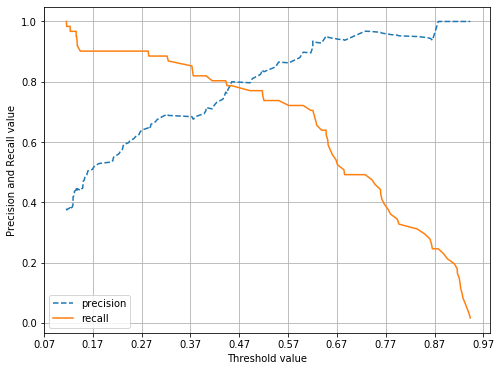

In [11]:
# 시각화하기 (sampling 하지않고 모든 값)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    th_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:th_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:th_boundary], label='recall')
    
    # X축 Scale 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, Y축 label과 legend 설정, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.grid()
    plt.legend()
    
    plt.show()
    

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])